In [1]:
# extract boundaries & timeseries folders from Wilson_2025_Antarctica_SGL_data_and_code
# downloadable here: https://zenodo.org/records/16330565


# these are the dependancies you will have to install
'''
%pip install seaborn
%pip install geopandas
%pip install contextily
%pip install geodatasets
'''

'\n%pip install seaborn\n%pip install geopandas\n%pip install contextily\n%pip install geodatasets\n'

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import glob
import contextily as ctx
from geodatasets import get_path
import os


c:\Users\cambo\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
existing_boundary_pathName = r'C:\Users\cambo\Desktop\ML-26\New folder (2)\boundaries\existing_sgl_lake_boundaries\existing_sgl_lake_boundaries\*.geojson'
new_boundary_pathName = r'C:\Users\cambo\Desktop\ML-26\New folder (2)\boundaries\new_sgl_lake_boundaries\new_sgl_glake_boundaries\*.geojson'
validation_lake_ts_pathName = r'C:\Users\cambo\Desktop\ML-26\New folder (2)\timeseries\validation_lake_ts\validation_lake_ts\*.csv'
new_lake_ts_pathName = r'C:\Users\cambo\Desktop\ML-26\New folder (2)\timeseries\new_lake_ts\new_lake_ts\*.csv'

In [4]:
# import boundary files & shape of antartica (w/ help from DeepSeek) 
existing_filePaths = glob.glob(existing_boundary_pathName)
existing_gdfs = [gpd.read_file(f).assign(lake_name=os.path.basename(f)) for f in existing_filePaths]
print(len(existing_gdfs))

new_filePaths = glob.glob(new_boundary_pathName)
new_gdfs = [gpd.read_file(f).assign(lake_name=os.path.basename(f)) for f in new_filePaths]
print(len(new_gdfs))

outlines = gpd.GeoDataFrame(pd.concat(existing_gdfs + new_gdfs, ignore_index=True))
print(len(outlines))

world = gpd.read_file('https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip')
antarctica = world[world['ADMIN'] == 'Antarctica']
print(len(antarctica))

35
121
156
1


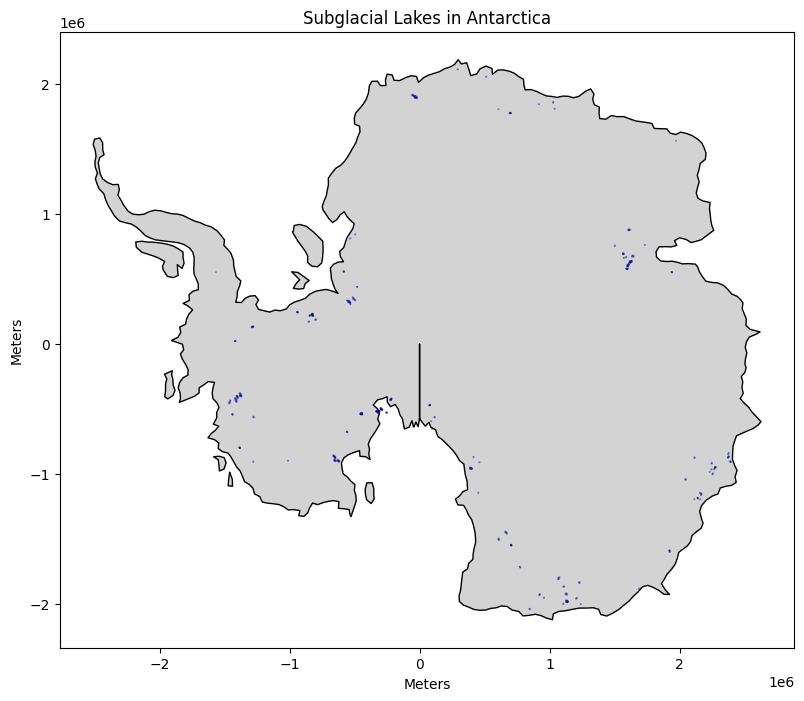

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))

# this sets both objects to the same scale - meters works, but lat/long degrees looks messy
antarctica = antarctica.to_crs(epsg=3031)
outlines = outlines.to_crs(epsg=3031)

antarctica.plot(ax=ax, color='lightgray', edgecolor='black')
outlines.plot(ax=ax, color='blue', edgecolor='darkblue', alpha=0.5, markersize=1)
ax.set_title("Subglacial Lakes in Antarctica");
ax.set_xlabel("Meters");
ax.set_ylabel("Meters");

In [6]:
# do basically the same thing, but for time series
existing_ts_filePaths = glob.glob(validation_lake_ts_pathName)
existing_csvs = [pd.read_csv(f).assign(lake_name=os.path.basename(f)) for f in existing_ts_filePaths]
print(len(existing_csvs))

new_ts_filePaths = glob.glob(new_lake_ts_pathName)
new_csvs = [pd.read_csv(f).assign(lake_name=os.path.basename(f)) for f in new_ts_filePaths]
print(len(new_csvs))

timeseries=pd.concat(existing_csvs + new_csvs, ignore_index=True)
print(timeseries.columns)

35
85
Index(['date (decimal year)', 'in lake mean elevation anomaly (m)',
       'in lake data points', 'in lake standard deviation', 'in lake error',
       'in lake cumulative error',
       'in lake detrended mean elevation anomaly (m)',
       'out of lake mean elevation anomaly (m)', 'out of lake data points',
       'out of lake standard deviation', 'out of lake error',
       'out of lake cumulative error',
       'out of lake detrended mean elevation anomaly (m)', 'lake_name'],
      dtype='str')


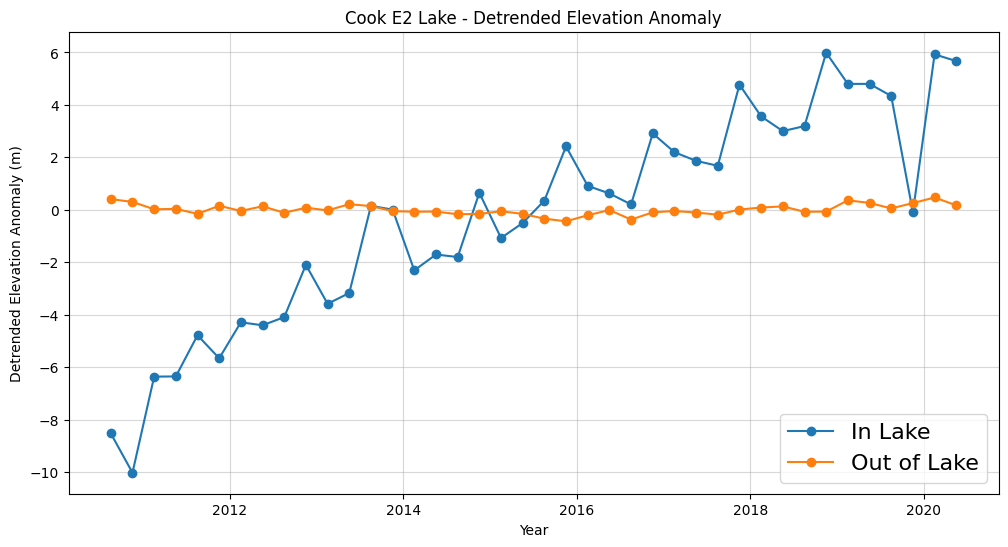

In [7]:
# plot elevation anomaly for Cook E2
cookE2 = timeseries[timeseries['lake_name'].str.contains('CookE2', na=False)]

plt.figure(figsize=(12, 6))
plt.plot(cookE2['date (decimal year)'], cookE2['in lake detrended mean elevation anomaly (m)'], marker='o', linestyle='-', label="In Lake")
plt.plot(cookE2['date (decimal year)'], cookE2['out of lake detrended mean elevation anomaly (m)'], marker='o', linestyle='-', label="Out of Lake")
plt.xlabel('Year')
plt.ylabel('Detrended Elevation Anomaly (m)')
plt.title('Cook E2 Lake - Detrended Elevation Anomaly')
plt.grid(True, alpha=0.5)
plt.legend(loc="lower right", fontsize=16)
plt.show()

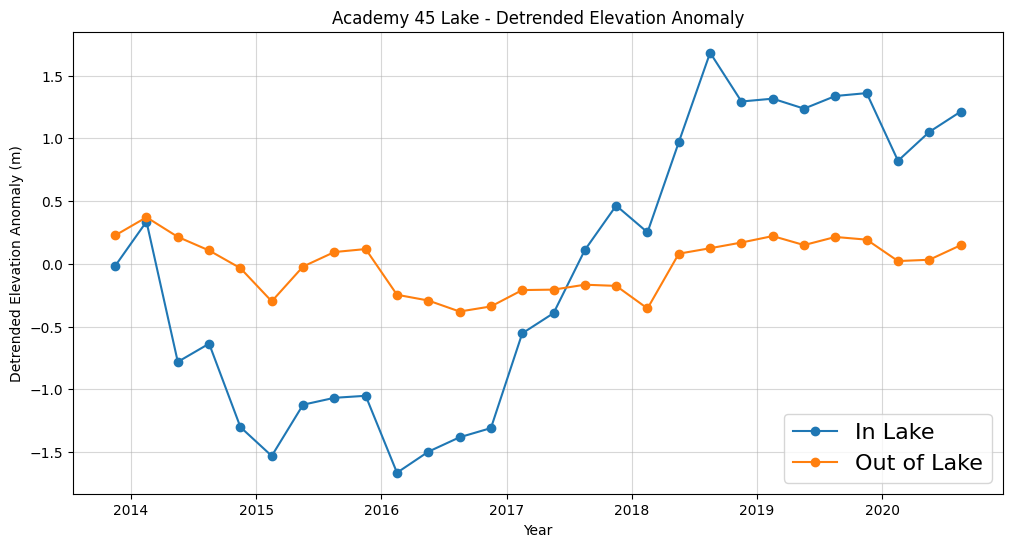

In [8]:
# plot elevation anomaly for Academy 45
academy45 = timeseries[timeseries['lake_name'].str.contains('Academy_45', na=False)]

plt.figure(figsize=(12, 6))
plt.plot(academy45['date (decimal year)'], academy45['in lake detrended mean elevation anomaly (m)'], marker='o', linestyle='-', label="In Lake")
plt.plot(academy45['date (decimal year)'], academy45['out of lake detrended mean elevation anomaly (m)'], marker='o', linestyle='-', label="Out of Lake")
plt.xlabel('Year')
plt.ylabel('Detrended Elevation Anomaly (m)')
plt.title('Academy 45 Lake - Detrended Elevation Anomaly')
plt.grid(True, alpha=0.5)
plt.legend(loc="lower right", fontsize=16)
plt.show()